읽기 능력에따른 수학 점수를 알아보자

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression

# 1. 데이터 셋 준비하기

- https://www.kaggle.com/datasets/rkiattisak/student-performance-in-mathematics

- exams.csv 파일 참조

- math score readingscore 두개의 특성을 사용

In [61]:
csvData = pd.read_csv('Data\Salary.csv', header=0)
readingscore = np.array(csvData[["YearsExperience"]].values.tolist())
mathscore = np.array(csvData[["Salary"]].values.tolist())
print(readingscore)
print(mathscore)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]
 [11.2]
 [11.5]
 [12.3]
 [12.9]
 [13.5]]
[[ 39343]
 [ 46205]
 [ 37731]
 [ 43525]
 [ 39891]
 [ 56642]
 [ 60150]
 [ 54445]
 [ 64445]
 [ 57189]
 [ 63218]
 [ 55794]
 [ 56957]
 [ 57081]
 [ 61111]
 [ 67938]
 [ 66029]
 [ 83088]
 [ 81363]
 [ 93940]
 [ 91738]
 [ 98273]
 [101302]
 [113812]
 [109431]
 [105582]
 [116969]
 [112635]
 [122391]
 [121872]
 [127345]
 [126756]
 [128765]
 [135675]
 [139465]]


2. 데이터 산점도 출력

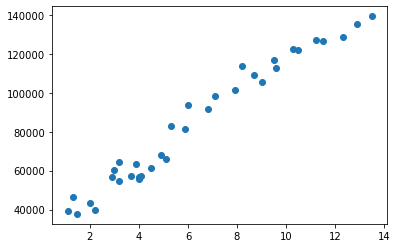

In [62]:
plt.scatter(readingscore, mathscore)
plt.show()

3. 훈련 세트와 테스트 세트로 분활


In [63]:
train_input, test_input, train_target, test_target = train_test_split(readingscore, mathscore, random_state=42)

train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

선형 회귀 모델로 샘플 데이터 훈련 예측

- 40에 대해 예측합니다.

In [65]:
lr = LinearRegression()

lr.fit(train_input, train_target)
print(lr.predict([[20]]), lr.coef_, lr.intercept_)

[[200938.68525914]] [[8603.62770643]] [28866.13113049]


9. 선형 회귀 모델의 산점도 출력

· 1차 방정식 그래프를 출력

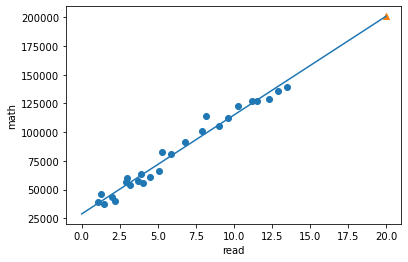

In [72]:
plt.scatter(train_input, train_target)

plt.plot([0, 20], [0 * lr.coef_[0] + lr.intercept_, 20 * lr.coef_[0] + lr.intercept_])

plt.scatter(20, 200938.68525914, marker="^")
plt.xlabel("read")
plt.ylabel("math")
plt.show()

10. 결정 계수(R2) 점수 확인

. 훈련 세트와 테스트 세트의 R2확인

In [73]:
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.9742750759768667
0.9094204577612954


11. 2차 방정식 그리기

. 훈련 세트와 테스트 세트 제곱근 생성

In [75]:
train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))
print(train_poly.shape, test_poly.shape)

(26, 2) (9, 2)


12. 선형 회귀 모델 훈련

. 기울기, 절편 print()로 확인

- predict()사용으로 예측 샘플 값 확인

In [82]:
lr = LinearRegression()
lr.fit(train_poly, train_target)

print(lr.coef_, lr.intercept_)
print(lr.predict([[20**2, 20]]))

[[ -157.46355667 10830.00074785]] [23455.77494406]
[[177070.36723383]]


13. 2차 방정식으로 훈련 세트의 산점도 출력

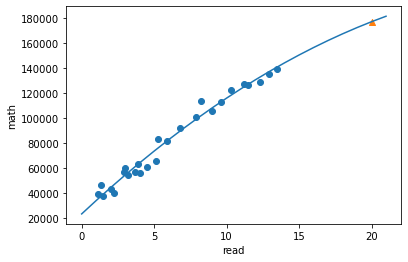

In [85]:
point = np.arange(0, 22)
plt.scatter(train_input, train_target)
plt.plot(point, -157.46355667 * point ** 2 + 10830.00074785 *point+23455.77494406)
plt.scatter(20, 177070.36723383, marker="^")
plt.xlabel("read")
plt.ylabel("math")
plt.show()


14. (최종) 훈련 세트, 테스트 세트로 결정계수(R2) 출력

In [86]:
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9775180487789702
0.9256586022967014
